# Predição de Churn em empresas provedoras de serviços de Internet

# 1. Problema de Negócio

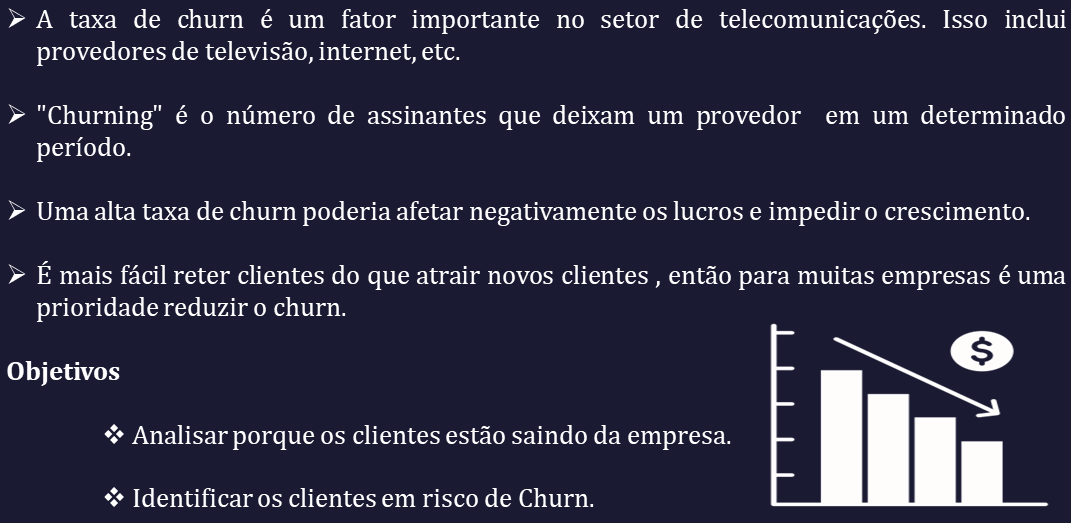

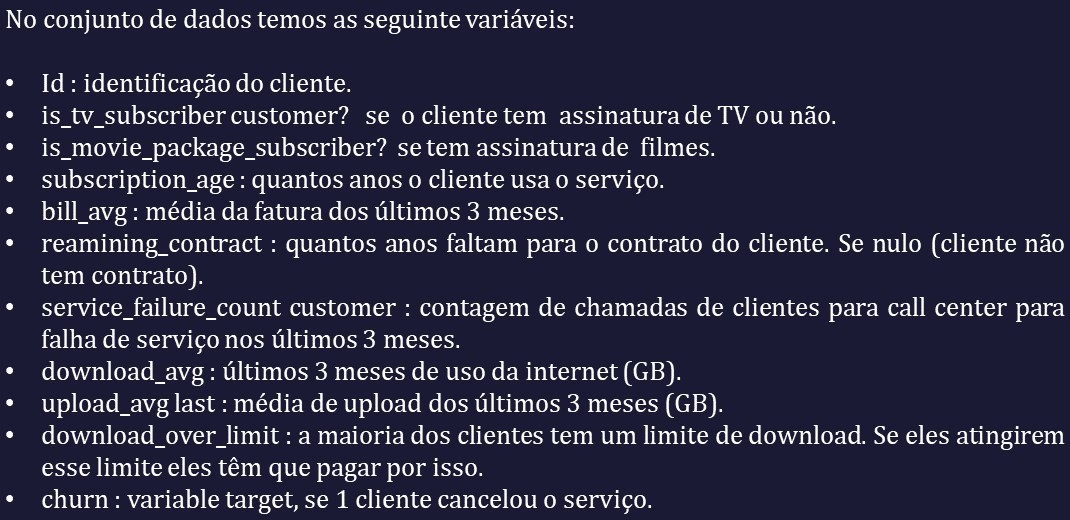

Data Source: https://www.kaggle.com/datasets/mehmetsabrikunt/internet-service-churn

# 2. Importar bibliotecas e conjunto de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("internet_service_churn.csv")

In [3]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [4]:
# Obter uma descrição dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


<div class="alert  alert-block alert-info">
            <b> 11 variáveis e 72274 observações no dataset e a variável churn é a variável alvo. A variable download_avg e upload_avg tem missing values. Na variable reamining_contract a ausência de valores indica que o cliente não possui contrato. </b>
</div>


In [5]:
# A variável id representa o novo índice atribuído ao conjunto de dados
df = df.set_index("id")

In [6]:
# Resumo dos atributos numéricos
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_tv_subscriber,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
is_movie_package_subscriber,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
subscription_age,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
bill_avg,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
reamining_contract,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
service_failure_count,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
download_over_limit,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00
churn,72274.0,0.554141,0.497064,0.00,0.00,1.00,1.00,1.00


* 81% dos clientes é assinante de tv. 
* 33% dos clientes é assinante do pacote de filmes.
* A duração média do uso do serviço pelos clientes é de quase dois anos e meio.
* Nos últimos três meses, cerca de um quarto dos clientes pagaram menos de 13 dólares pelo serviço.
* O número máximo de chamadas ao call center devido a falhas no serviço é 19.
* Aproximadamente 75% dos clientes não excederam o limite de download.
* Mais da metade dos clientes (55,41%) deixaram a empresa.

In [7]:
# Qual a volumetria de dados da base e a relação do churn?
df['churn'].value_counts(dropna=False)


1    40050
0    32224
Name: churn, dtype: int64

# 3. Análise Exploratória

### Variable is_tv_subscriber

<AxesSubplot:>

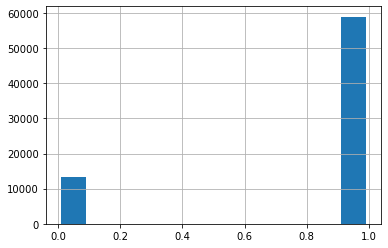

In [8]:
df['is_tv_subscriber'].hist( rwidth=.8)


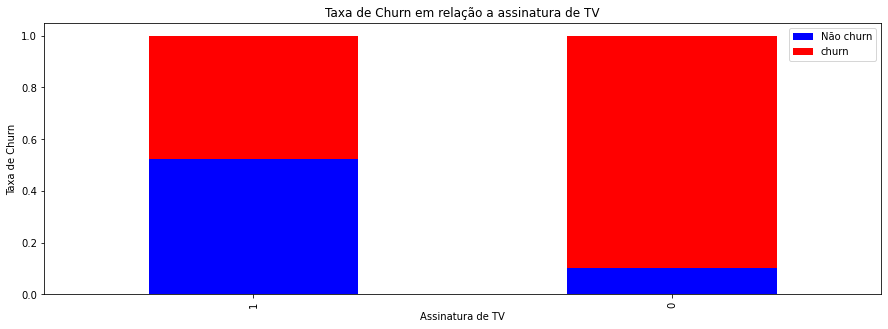

In [9]:
cnt_0 = df.loc[df.churn==0].is_tv_subscriber.value_counts(dropna=False)
cnt_1 = df.loc[df.churn==1].is_tv_subscriber.value_counts(dropna=False)

aux = pd.concat([cnt_0.rename('Não churn'),cnt_1.rename('churn')],axis=1)
aux = aux.div(aux.sum(axis='columns'),axis='rows')


plt.figure(figsize=(15,5))
plt.title('Taxa de Churn em relação a assinatura de TV')
plt.xlabel('Assinatura de TV');
plt.ylabel('Taxa de Churn');
ax = plt.subplot(1,1,1)
aux.plot(ax=ax,kind='bar',stacked=True,color=['b','r']);

* Os clientes que não possuem uma assinatura de TV tendem a deixar a empresa e porcentagem de Churn é bastante elevada.

### Variable is_movie_package_subscriber

<AxesSubplot:>

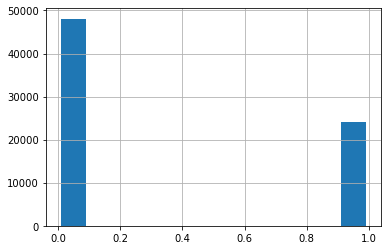

In [10]:
df['is_movie_package_subscriber'].hist( rwidth=.8)

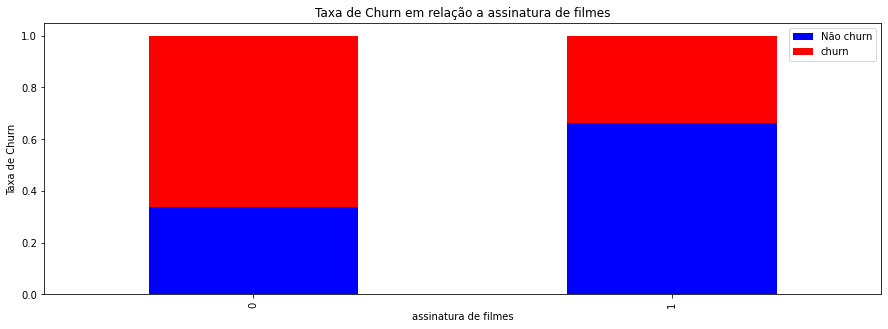

In [11]:
cnt_0 = df.loc[df.churn==0].is_movie_package_subscriber.value_counts(dropna=False)
cnt_1 = df.loc[df.churn==1].is_movie_package_subscriber.value_counts(dropna=False)

aux = pd.concat([cnt_0.rename('Não churn'),cnt_1.rename('churn')],axis=1)
aux = aux.div(aux.sum(axis='columns'),axis='rows')

plt.figure(figsize=(15,5))
plt.title('Taxa de Churn em relação a assinatura de filmes')
plt.xlabel('assinatura de filmes');
plt.ylabel('Taxa de Churn');
ax = plt.subplot(1,1,1)
aux.plot(ax=ax,kind='bar',stacked=True,color=['b','r']);

* Os clientes que não têm assinatura de filmes têm um risco maior de churn do que os clientes que têm serviço de filmes.

### Variable download_over_limit

<AxesSubplot:>

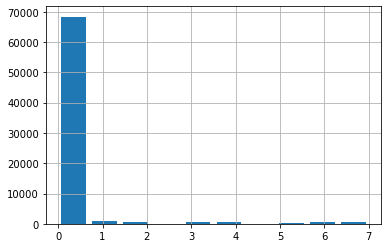

In [12]:
df['download_over_limit'].hist( rwidth=0.8)

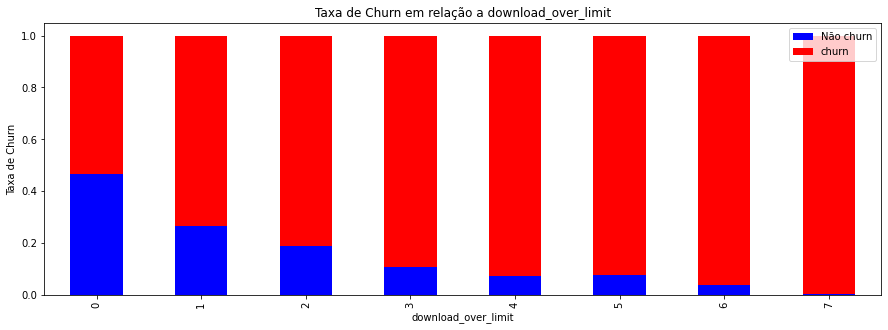

In [13]:
cnt_0 = df.loc[df.churn==0].download_over_limit.value_counts(dropna=False)
cnt_1 = df.loc[df.churn==1].download_over_limit.value_counts(dropna=False)

aux = pd.concat([cnt_0.rename('Não churn'),cnt_1.rename('churn')],axis=1)
aux = aux.div(aux.sum(axis='columns'),axis='rows')

plt.figure(figsize=(15,5))
plt.title('Taxa de Churn em relação a download_over_limit')
plt.xlabel('download_over_limit')
plt.ylabel('Taxa de Churn')
ax = plt.subplot(1,1,1)
aux.plot(ax=ax,kind='bar',stacked=True,color=['b','r']);

*  Quando os clientes ultrapassam o limite de download estabelecido pela empresa  a taxa de churn tende a crescer.

### Variable subscription_age

<AxesSubplot:>

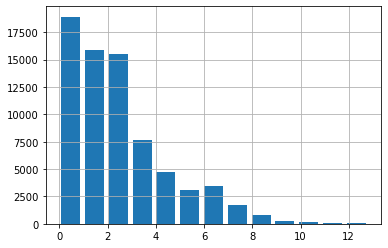

In [14]:
df['subscription_age'].hist(bins=13, rwidth=.8)

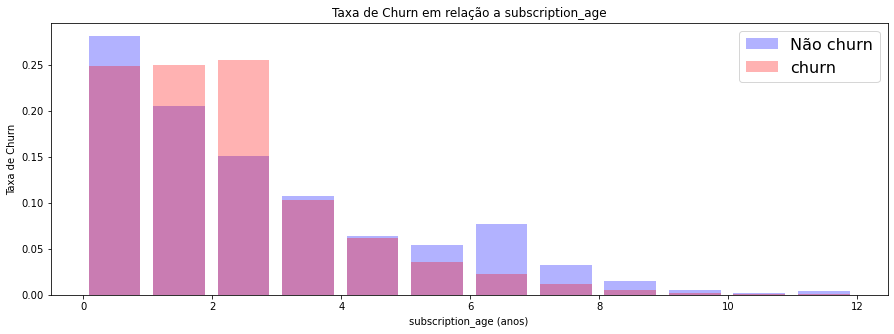

In [15]:
plt.figure(figsize=(15,5))

minimo = df.subscription_age.min()
maximo = df.subscription_age.max()


bins = np.arange(minimo,maximo+0.1,1)

plt.title('Taxa de Churn em relação a subscription_age')
plt.xlabel('subscription_age (anos)')
plt.ylabel('Taxa de Churn')
plt.hist(df.loc[df.churn==0].subscription_age, bins=bins, color='b', density=True, rwidth=.8, alpha=.3, label='Não churn')
plt.hist(df.loc[df.churn==1].subscription_age, bins=bins, color='r', density=True, rwidth=.8, alpha=.3, label='churn')

plt.legend(fontsize=16);

* Os clientes que cancelaram os serviços da empresa, em geral, costumavam usar o serviço por um a dois anos.

### Variable bill_avg

<AxesSubplot:>

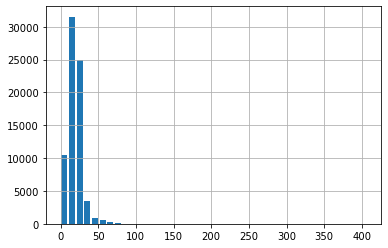

In [16]:
df['bill_avg'].hist(bins=40, rwidth=.8)

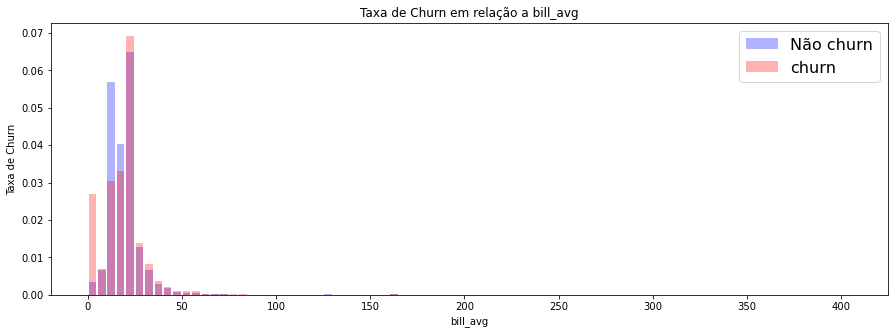

In [17]:
plt.figure(figsize=(15,5))

minimo = df.bill_avg.min()
maximo = df.bill_avg.max()
bins = np.arange(minimo,maximo,5)

plt.title('Taxa de Churn em relação a bill_avg')
plt.xlabel('bill_avg')
plt.ylabel('Taxa de Churn')
plt.hist(df.loc[df.churn==0].bill_avg, bins=bins, color='b', density=True, rwidth=.8, alpha=.3, label='Não churn')
plt.hist(df.loc[df.churn==1].bill_avg, bins=bins, color='r', density=True, rwidth=.8, alpha=.3, label='churn')

plt.legend(fontsize=16);

* Os clientes que pagaram entre 10 a 20 dólares pelo serviço nos últimos três meses tendem a ficar na empresa.

### Variable reamining_contract

<AxesSubplot:>

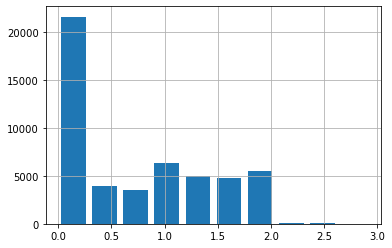

In [18]:
df['reamining_contract'].hist(bins=10, rwidth=.8)

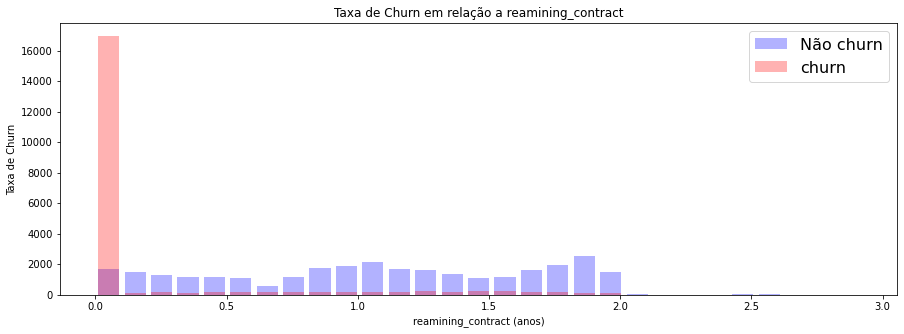

In [19]:
plt.figure(figsize=(15,5))

minimo = df.reamining_contract.min()
maximo = df.reamining_contract.max()
nbins=30

bins = np.linspace(minimo,maximo,nbins)

plt.title('Taxa de Churn em relação a reamining_contract')
plt.xlabel('reamining_contract (anos)')
plt.ylabel('Taxa de Churn')
plt.hist(df.loc[df.churn==0].reamining_contract, bins=bins, color='b', density=False, rwidth=.8, alpha=.3, label='Não churn')
plt.hist(df.loc[df.churn==1].reamining_contract, bins=bins, color='r', density=False, rwidth=.8, alpha=.3, label='churn')

plt.legend(fontsize=16);

* Quando o contrato chega ao fim, é comum que a maioria dos clientes cancelem o serviço. 

### Variable service_failure_count

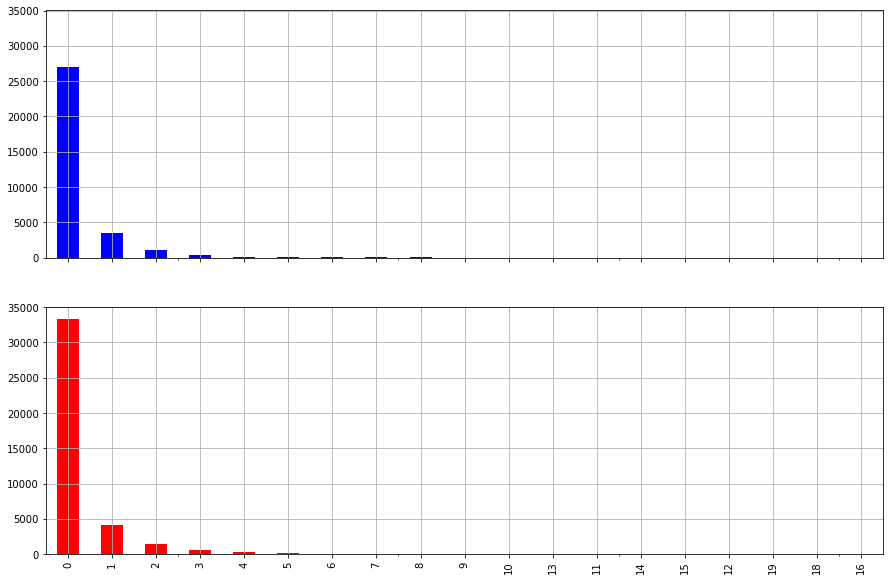

In [20]:
plt.figure(figsize=(15,2*5))
# 2 linhas, 1 coluna, gráfico 1
ax1 = plt.subplot(2,1,1)
df.loc[df.churn==0].service_failure_count.value_counts(dropna=False,normalize=False).plot(ax=ax1,kind='bar',color='b')
plt.grid()

# 2 linhas, 1 coluna, gráfico 2, e compartilha a mesma escala dos eixos x e y
ax2 = plt.subplot(2,1,2,sharex=ax1, sharey=ax1)
df.loc[df.churn==1].service_failure_count.value_counts(dropna=False,normalize=False).plot(ax=ax2,kind='bar',color='r')
plt.grid()

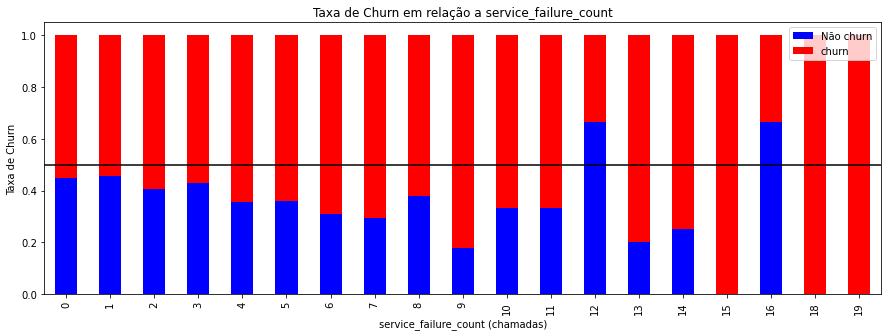

In [21]:
cnt_0 = df.loc[df.churn==0].service_failure_count.value_counts(dropna=False)
cnt_1 = df.loc[df.churn==1].service_failure_count.value_counts(dropna=False)

aux = pd.concat([cnt_0.rename('Não churn'),cnt_1.rename('churn')],axis=1).fillna(0)
aux = aux.div(aux.sum(axis='columns'),axis='rows')

plt.figure(figsize=(15,5))
plt.title('Taxa de Churn em relação a service_failure_count')
plt.xlabel('service_failure_count (chamadas)')
plt.ylabel('Taxa de Churn')
ax = plt.subplot(1,1,1)
aux.plot(ax=ax,kind='bar',stacked=True,color=['b','r'])
plt.axhline(0.5,color='k');

* Parece não haver correlação entre o número de falhas de serviço e o cancelamento do serviço por parte dos clientes.

### Variable download_avg

<AxesSubplot:>

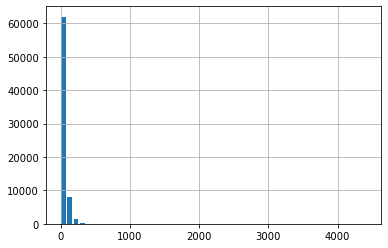

In [22]:
df['download_avg'].hist(bins=50, rwidth=.8)

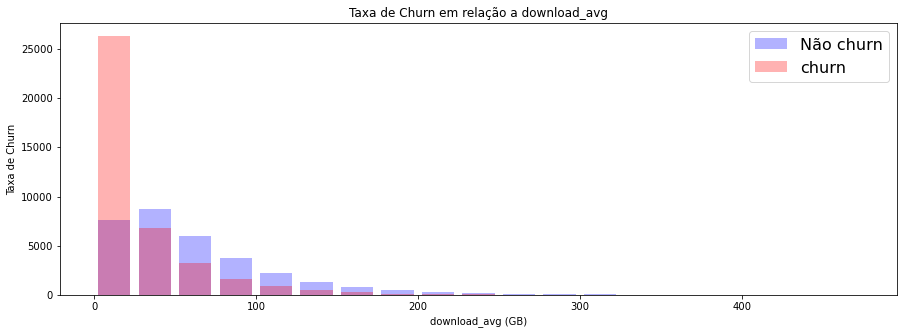

In [23]:
plt.figure(figsize=(15,5))

minimo = df.download_avg.min()
maximo = df.download_avg.max()
bins = np.arange(minimo,500,25)

plt.title('Taxa de Churn em relação a download_avg')
plt.xlabel('download_avg (GB)')
plt.ylabel('Taxa de Churn')
plt.hist(df.loc[df.churn==0].download_avg, bins=bins, color='b', density=False, rwidth=.8, alpha=.3, label='Não churn')
plt.hist(df.loc[df.churn==1].download_avg, bins=bins, color='r', density=False, rwidth=.8, alpha=.3, label='churn')

plt.legend(fontsize=16);

* A empresa tem uma proporção maior de clientes que cancelam o serviço quando o volume de download é inferior a 25GB.


### Variable upload_avg

<AxesSubplot:>

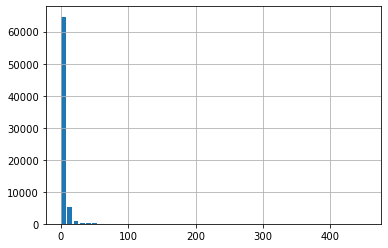

In [24]:
df['upload_avg'].hist(bins=50, rwidth=.8)

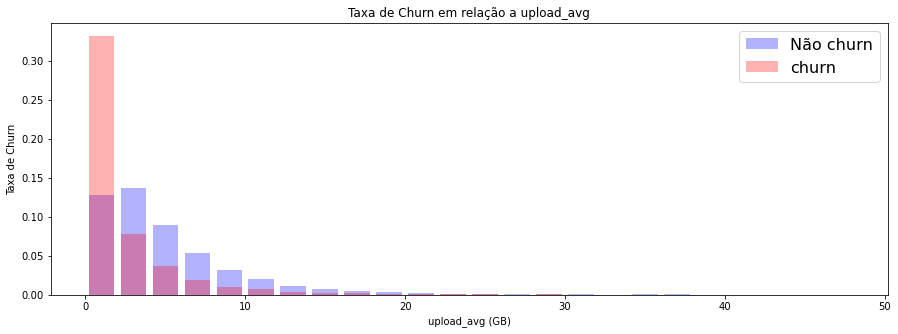

In [25]:
plt.figure(figsize=(15,5))

minimo = df.upload_avg.min()
maximo = df.upload_avg.max()
bins = np.arange(minimo,50,2)

plt.title('Taxa de Churn em relação a upload_avg')
plt.xlabel('upload_avg (GB)')
plt.ylabel('Taxa de Churn')
plt.hist(df.loc[df.churn==0].upload_avg, bins=bins, color='b', density=True, rwidth=.8, alpha=.3, label='Não churn')
plt.hist(df.loc[df.churn==1].upload_avg, bins=bins, color='r', density=True, rwidth=.8, alpha=.3, label='churn')

plt.legend(fontsize=16);

* A empresa registra uma proporção maior de clientes que cancelam o serviço quando o volume médio de upload é inferior a 2GB.

* os clientes com alta taxa de Churn são aqueles que não têm assinatura de filmes, não possuem assinatura de TV e com o contrato concluído. 

## Correlação de variáveis

In [26]:
# correlação de variáveis categóricas
df_cat = df[[
    'is_tv_subscriber',
    'is_movie_package_subscriber',
    'download_over_limit',
    'service_failure_count',
    
    'churn'
        ]]

In [27]:
# Método Cramer-V.
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

corr_cat = df_cat.corr(cramers_v)
corr_cat

,is_tv_subscriber,is_movie_package_subscriber,download_over_limit,service_failure_count,churn
is_tv_subscriber,1.000000,0.337379,0.110753,0.016359,0.327528
is_movie_package_subscriber,0.337379,1.000000,0.026386,0.013782,0.307117
download_over_limit,0.110753,0.026386,1.000000,0.002954,0.164090
service_failure_count,0.016359,0.013782,0.002954,1.000000,0.025586
churn,0.327528,0.307117,0.164090,0.025586,1.000000


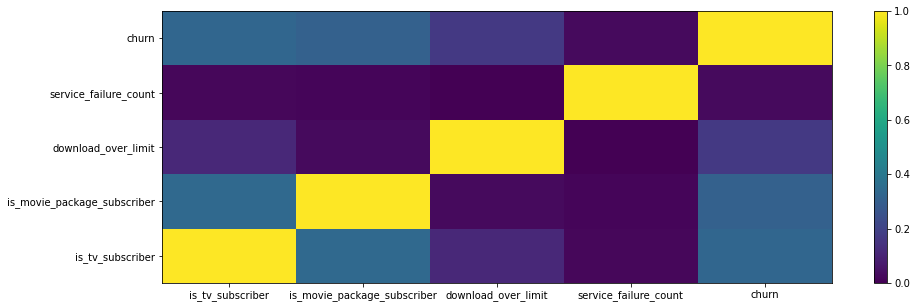

In [28]:
plt.figure(figsize=(15,5))
plt.pcolormesh(corr_cat.index, corr_cat.columns, corr_cat, vmin=0, vmax=1, shading='nearest')
plt.colorbar()

In [29]:
# correlação de variáveis numericas
df_num = df[[
    'subscription_age',
    'bill_avg',    
    'download_avg',
    'upload_avg',
    'reamining_contract',
    'churn'
        ]]

In [30]:
# Método pearson
corr_num = df_num.corr(method='pearson')
corr_num


,subscription_age,bill_avg,download_avg,upload_avg,reamining_contract,churn
subscription_age,1.000000,0.067329,0.069331,0.030277,0.039269,-0.122441
bill_avg,0.067329,1.000000,0.431674,0.334236,-0.057088,-0.021058
download_avg,0.069331,0.431674,1.000000,0.554436,0.167568,-0.298063
upload_avg,0.030277,0.334236,0.554436,1.000000,0.073651,-0.162690
reamining_contract,0.039269,-0.057088,0.167568,0.073651,1.000000,-0.625450
churn,-0.122441,-0.021058,-0.298063,-0.162690,-0.625450,1.000000


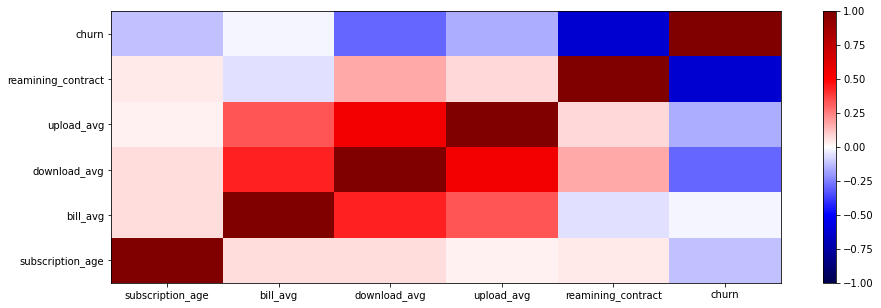

In [31]:
plt.figure(figsize=(15,5))
plt.pcolormesh(corr_num.index, corr_num.columns, corr_num, vmin=-1, vmax=1, shading='nearest', cmap='seismic')
plt.colorbar()

* A maior correlação existe entre as variáveis "download_avg" e "upload_avg", apresentando um coeficiente de correlação de 0,55. Não parece haver correlações significativas ou fortes entre as variáveis.

# 4. Modelagem

In [32]:
### Separação em treino e teste
from sklearn.model_selection import train_test_split

X = df.drop('churn', axis=1)
y = df['churn']

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.25, random_state=45)

## 4.1 Dataprep

### Tratamento de missings

In [33]:
# Prenchimento de valores missing
X_tr.isnull().mean()

is_tv_subscriber               0.000000
is_movie_package_subscriber    0.000000
subscription_age               0.000000
bill_avg                       0.000000
reamining_contract             0.298958
service_failure_count          0.000000
download_avg                   0.005258
upload_avg                     0.005258
download_over_limit            0.000000
dtype: float64

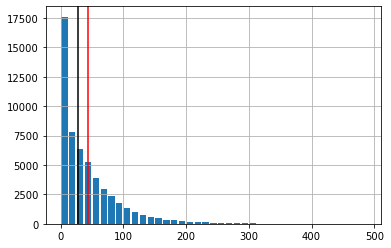

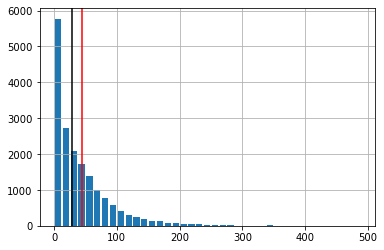

In [34]:
# Para download_avg                   

minimo = X_tr.download_avg.min()

bins = np.arange(minimo,500,12.5)

plt.figure()
X_tr.download_avg.hist(bins=bins, rwidth=.8)
plt.axvline(X_tr.download_avg.mean(), color='r')
plt.axvline(X_tr.download_avg.median(), color='k')
plt.figure()
X_ts.download_avg.hist(bins=bins, rwidth=.8)
plt.axvline(X_tr.download_avg.mean(), color='r')
plt.axvline(X_tr.download_avg.median(), color='k')

In [35]:
X_tr.download_avg.mean(), X_tr.download_avg.median()

(43.68134458457005, 27.9)

In [36]:
X_tr.download_avg.fillna(X_tr.download_avg.median(), inplace=True)
X_ts.download_avg.fillna(X_tr.download_avg.median(), inplace=True)

<AxesSubplot:>

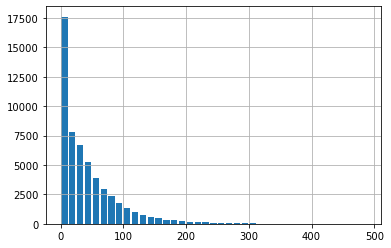

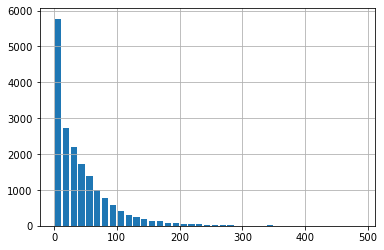

In [37]:
minimo = X_tr.download_avg.min()

bins = np.arange(minimo,500,12.5)

plt.figure()
X_tr.download_avg.hist(bins=bins, rwidth=.8)
plt.figure()
X_ts.download_avg.hist(bins=bins, rwidth=.8)

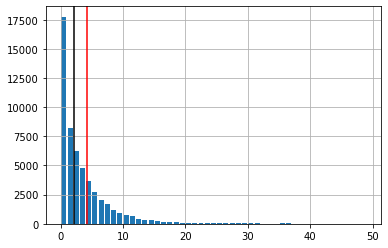

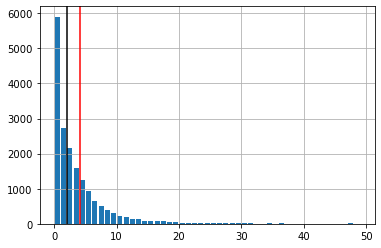

In [38]:
# Para upload_avg                   

minimo = X_tr.upload_avg.min()

bins = np.arange(minimo,50,1)

plt.figure()
X_tr.upload_avg.hist(bins=bins, rwidth=.8)
plt.axvline(X_tr.upload_avg.mean(), color='r')
plt.axvline(X_tr.upload_avg.median(), color='k')
plt.figure()
X_ts.upload_avg.hist(bins=bins, rwidth=.8)
plt.axvline(X_tr.upload_avg.mean(), color='r')
plt.axvline(X_tr.upload_avg.median(), color='k')

In [39]:
X_tr.upload_avg.mean(), X_tr.upload_avg.median()

(4.178994807121707, 2.1)

In [40]:
X_tr.upload_avg.fillna(X_tr.upload_avg.median(), inplace=True)
X_ts.upload_avg.fillna(X_tr.upload_avg.median(), inplace=True)

<AxesSubplot:>

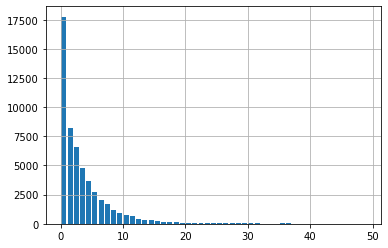

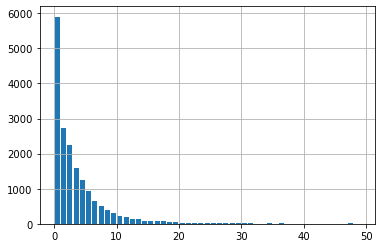

In [41]:
minimo = X_tr.upload_avg.min()

bins = np.arange(minimo,50,1)

plt.figure()
X_tr.upload_avg.hist(bins=bins, rwidth=.8)
plt.figure()
X_ts.upload_avg.hist(bins=bins, rwidth=.8)

### Agrupamento de Categorias

In [42]:
# Agrupando download_over_limit em duas categorias
X_tr['download_over_limit'].value_counts()

0    51315
1      554
6      531
2      427
7      363
3      359
4      342
5      314
Name: download_over_limit, dtype: int64

In [43]:
def auxiliar(x):
    if x == 0:
        return '0'
    else:
        return '1+'

X_tr['download_over_limit'] = X_tr['download_over_limit'].apply(auxiliar)
X_ts['download_over_limit'] = X_ts['download_over_limit'].apply(auxiliar)

In [44]:
# Agrupando service_failure_count
X_tr['service_failure_count'].value_counts()

0     45321
1      5747
2      1807
3       671
4       307
5       159
6        73
7        46
8        29
10       12
9        12
12        4
11        4
13        4
14        3
16        3
18        1
19        1
15        1
Name: service_failure_count, dtype: int64

In [45]:
def auxiliar1(x):
    if x == 0:
        return '0'  
    
    elif x == 1:
        return '1'
       
    else:
        return '2+'

X_tr['service_failure_count'] = X_tr['service_failure_count'].apply(auxiliar1)
    
X_ts['service_failure_count'] = X_ts['service_failure_count'].apply(auxiliar1)

### Categorização de variáveis contínuas

In [46]:
# Categorização do reamining_contract
def auxiliar2(x):
    if x == 0:
        return 'finalizado'
    elif x <= 1:
        return 'menos que 1'
    elif x > 1 :
        return 'mais que 1'
    
    else:
        return 'sem contrato'

X_tr['reamining_contract'] = X_tr['reamining_contract'].apply(auxiliar2)
X_ts['reamining_contract'] = X_ts['reamining_contract'].apply(auxiliar2)

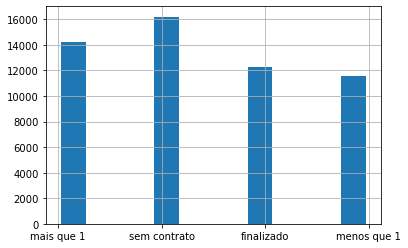

In [47]:
X_tr['reamining_contract'].hist( rwidth=.8);

### Detecção e tratamento de outliers 

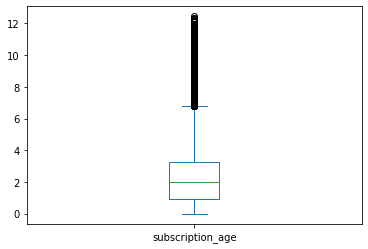

In [48]:
# Variable subscription_age
X_tr['subscription_age'].plot(kind = 'box');

In [49]:
top = X_tr['subscription_age'].quantile(0.975)
top

7.519000000000014

In [50]:
X_tr.loc[X_tr['subscription_age'] > top, 'subscription_age'] = top
X_ts.loc[X_ts['subscription_age'] > top, 'subscription_age'] = top

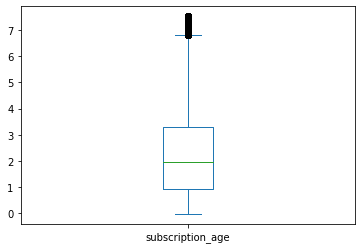

In [51]:
X_tr['subscription_age'].plot(kind = 'box');

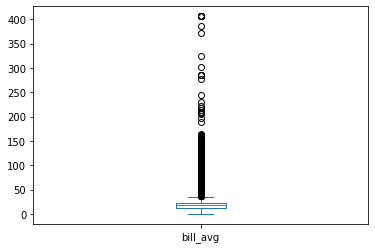

In [52]:
# Variable bill_avg
X_tr['bill_avg'].plot(kind = 'box');

In [53]:
top1 = X_tr['bill_avg'].quantile(0.975)
top1

42.0

In [54]:
X_tr.loc[X_tr['bill_avg'] > top1, 'bill_avg'] = top1
X_ts.loc[X_ts['bill_avg'] > top1, 'bill_avg'] = top1

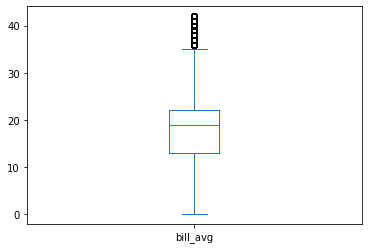

In [55]:
X_tr['bill_avg'].plot(kind = 'box');

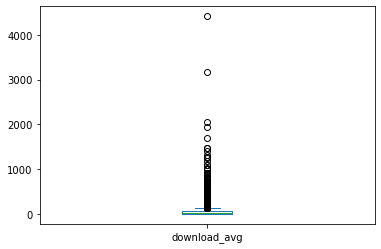

In [56]:
# Variable download_avg
X_tr['download_avg'].plot(kind = 'box');

In [57]:
top2 = X_tr['download_avg'].quantile(0.975)
top2

177.8

In [58]:
X_tr.loc[X_tr['download_avg'] > top2, 'download_avg'] = top2
X_ts.loc[X_ts['download_avg'] > top2, 'download_avg'] = top2

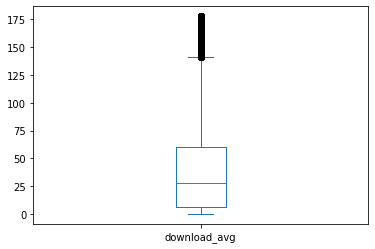

In [59]:
X_tr['download_avg'].plot(kind = 'box');

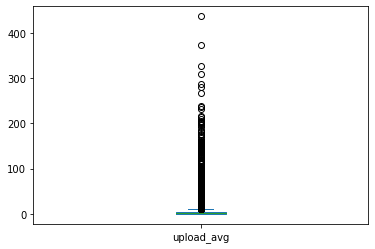

In [60]:
# Variable upload_avg
X_tr['upload_avg'].plot(kind = 'box');

In [61]:
top3 = X_tr['upload_avg'].quantile(0.975)
top3

19.1

In [62]:
X_tr.loc[X_tr['upload_avg'] > top3, 'upload_avg'] = top3
X_ts.loc[X_ts['upload_avg'] > top3, 'upload_avg'] = top3

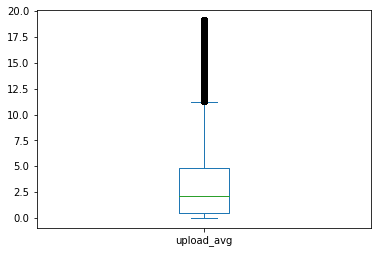

In [63]:
X_tr['upload_avg'].plot(kind = 'box');

In [64]:
X_tr.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
id,,,,,,,,,
1436638,1,1,0.95,28,mais que 1,0,72.9,2.6,0
1074923,0,0,1.98,24,sem contrato,0,15.4,3.8,0
839495,1,0,3.95,22,finalizado,0,103.3,18.3,0
1681472,1,0,0.70,10,menos que 1,1,40.8,2.4,0
1381288,1,1,1.26,13,mais que 1,2+,25.6,3.6,0


## 4.2 Encoding de variaveis categóricas

In [65]:
features_one_hot = ['is_tv_subscriber', 'is_movie_package_subscriber','reamining_contract', 'service_failure_count', 'download_over_limit',]

for f in features_one_hot:
    print(f,":", X_tr[f].nunique())

is_tv_subscriber : 2
is_movie_package_subscriber : 2
reamining_contract : 4
service_failure_count : 3
download_over_limit : 2


In [66]:
numerical_features = list(set(X_tr.columns) - set(features_one_hot))
numerical_features 

['bill_avg', 'download_avg', 'subscription_age', 'upload_avg']

In [67]:
from sklearn.preprocessing import OneHotEncoder

encoders = {}
dropped = {}
X_tr_encoded = X_tr.copy()
X_ts_encoded = X_ts.copy()
for col in features_one_hot:
    encoders[col] = OneHotEncoder(sparse=False, drop='first')
    encoders[col].fit(X_tr[[col]])
    
    dropped[col] = encoders[col].categories_[0][0]
    new_cols = [f'{col}_{cat}' for cat in encoders[col].categories_[0][1:]]
    
    X_tr_loc = pd.DataFrame(encoders[col].transform(X_tr[[col]]), index=X_tr.index, columns=new_cols)
    X_tr_encoded = X_tr_encoded.drop(col,axis=1)
    X_tr_encoded = X_tr_encoded.join(X_tr_loc)
    
    X_ts_loc = pd.DataFrame(encoders[col].transform(X_ts[[col]]), index=X_ts.index, columns=new_cols)
    X_ts_encoded = X_ts_encoded.drop(col,axis=1)
    X_ts_encoded = X_ts_encoded.join(X_ts_loc)

In [68]:
dropped

{'is_tv_subscriber': 0,
 'is_movie_package_subscriber': 0,
 'reamining_contract': 'finalizado',
 'service_failure_count': '0',
 'download_over_limit': '0'}

In [69]:
X_tr_encoded

,subscription_age,bill_avg,download_avg,upload_avg,is_tv_subscriber_1,is_movie_package_subscriber_1,reamining_contract_mais que 1,reamining_contract_menos que 1,reamining_contract_sem contrato,service_failure_count_1,service_failure_count_2+,download_over_limit_1+
id,,,,,,,,,,,,
1436638,0.95,28,72.9,2.6,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1074923,1.98,24,15.4,3.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
839495,3.95,22,103.3,18.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1681472,0.70,10,40.8,2.4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1381288,1.26,13,25.6,3.6,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
300147,0.70,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1429435,0.98,22,39.9,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
138557,3.72,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## 4.3 Escala das Variáveis Contínuas

In [70]:
from sklearn.preprocessing import RobustScaler
X_robust_tr = X_tr_encoded.copy()
X_robust_tr[['bill_avg', 'download_avg', 'subscription_age', 'upload_avg']] = RobustScaler().fit_transform(X_tr_encoded[['bill_avg', 'download_avg', 'subscription_age', 'upload_avg']])

X_robust_ts = X_ts_encoded.copy()
X_robust_ts[['bill_avg', 'download_avg', 'subscription_age', 'upload_avg']] = RobustScaler().fit_transform(X_ts_encoded[['bill_avg', 'download_avg', 'subscription_age', 'upload_avg']])

In [71]:
X_robust_tr

,subscription_age,bill_avg,download_avg,upload_avg,is_tv_subscriber_1,is_movie_package_subscriber_1,reamining_contract_mais que 1,reamining_contract_menos que 1,reamining_contract_sem contrato,service_failure_count_1,service_failure_count_2+,download_over_limit_1+
id,,,,,,,,,,,,
1436638,-0.438298,1.000000,0.837989,0.116279,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1074923,0.000000,0.555556,-0.232775,0.395349,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
839495,0.838298,0.333333,1.404097,3.767442,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1681472,-0.544681,-1.000000,0.240223,0.069767,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1381288,-0.306383,-0.666667,-0.042831,0.348837,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
300147,-0.544681,-2.111111,-0.519553,-0.488372,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1429435,-0.425532,0.333333,0.223464,-0.255814,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
138557,0.740426,-2.111111,-0.519553,-0.488372,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 5. Treinamento dos modelos

## Regressão Logística

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report


clf = LogisticRegression(penalty='none',random_state=45, max_iter=3_000)

In [73]:
scores = cross_val_score(clf, X_robust_tr, y_tr, cv=10, scoring='f1')

print(f"O valor médio do F1 foi de {scores.mean():.4f}")

O valor médio do F1 foi de 0.9297


In [74]:
# Ajuste do modelo nos dados de TREINO
clf.fit(X_robust_tr, y_tr)

# Utilizando o modelo ajustado para predizer os dados de TESTE
y_pred = clf.predict(X_robust_ts) 

# Matriz de confusão
clf_matrix = metrics.confusion_matrix(y_ts, y_pred)

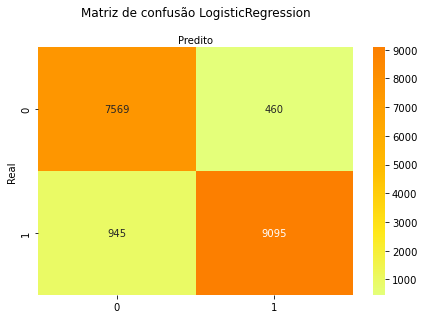

In [75]:
# Matriz de confusão Heatmap

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(clf_matrix), annot=True, cmap="Wistia" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusão LogisticRegression', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predito');

In [76]:
# Métricas de mensuração

print(classification_report(y_ts, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      8029
           1       0.95      0.91      0.93     10040

    accuracy                           0.92     18069
   macro avg       0.92      0.92      0.92     18069
weighted avg       0.92      0.92      0.92     18069



- **Precision**
   - 1: O modelo previu que 9555 clientes dariam churn, mas  95% deles realmente saíram da empresa.
   - 0: O modelo previu que 8514 clientes continuariam na empresa, mas 89% deles de fato permaneceram.
   
- **Recall**
   - 1: Dos 10040 clientes que realmente deixaram a empresa, o modelo foi capaz de identificar corretamente 91% deles.
   - 0: Dos 8029 clientes que realmente não deram churn, o modelo identificou corretamente 94% deles.
   
- **F1-Score**
   - 1: 93%
   - 0: 92%

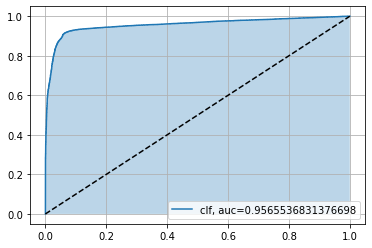

In [77]:
# Curva ROC

y_pred_proba = clf.predict_proba(X_robust_ts)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_ts,  y_pred_proba)
auc = metrics.roc_auc_score(y_ts, y_pred_proba)
plt.plot(fpr,tpr,label="clf, auc="+str(auc))
plt.legend(loc=4)
plt.plot((0,1),(0,1),'k--')
plt.fill_between(fpr, tpr,alpha=.3)
plt.grid()
plt.show()

* Dado que o F1-score e a AUC, já estão em um nível satisfatório, é possível utilizar o modelo com os hyperparâmetros default. Porém, podemos reduzir os falsos negativos e os falsos positivos utilizando outro algoritmo.

# Árvores de Decisão

In [78]:
# Definição dos parâmetros de VALIDAÇÃO CRUZADA

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': [48,49,50],
    'criterion': ['gini','entropy'],
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=45), #Primeiro arg: Modelo
    params,                                     #Segundo arg: Parâmetros
    cv=10,                                      #Arg `cv`: Qtd de folds
    scoring='f1',                          #Arg `scoring`: Métrica
    verbose=5, #Arg `verbose`: Mostra na tela
)

In [79]:
# Encontrar o melhor modelo nos dados de TREINO por validação cruzada

grid.fit(X_tr_encoded,y_tr)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END criterion=gini, max_leaf_nodes=48;, score=0.939 total time=   0.0s
[CV 2/10] END criterion=gini, max_leaf_nodes=48;, score=0.948 total time=   0.0s
[CV 3/10] END criterion=gini, max_leaf_nodes=48;, score=0.945 total time=   0.0s
[CV 4/10] END criterion=gini, max_leaf_nodes=48;, score=0.943 total time=   0.0s
[CV 5/10] END criterion=gini, max_leaf_nodes=48;, score=0.945 total time=   0.0s
[CV 6/10] END criterion=gini, max_leaf_nodes=48;, score=0.946 total time=   0.0s
[CV 7/10] END criterion=gini, max_leaf_nodes=48;, score=0.944 total time=   0.0s
[CV 8/10] END criterion=gini, max_leaf_nodes=48;, score=0.947 total time=   0.0s
[CV 9/10] END criterion=gini, max_leaf_nodes=48;, score=0.945 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=48;, score=0.942 total time=   0.0s
[CV 1/10] END criterion=gini, max_leaf_nodes=49;, score=0.939 total time=   0.0s
[CV 2/10] END criterion=gini, max_leaf_nodes=49

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=45),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [48, 49, 50]},
             scoring='f1', verbose=5)

In [80]:
# Qual foi o melhor parâmetro/modelo?

grid.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 49}

In [81]:
# Qual foi o melhor score médio F1-score?

grid.best_score_

0.9442545157914617

In [82]:
# Utilizando o modelo ajustado para predizer os dados de TESTE

y_pred_tree = grid.predict(X_ts_encoded)

# Matriz de confusão

grid_matrix = metrics.confusion_matrix(y_ts, y_pred_tree)


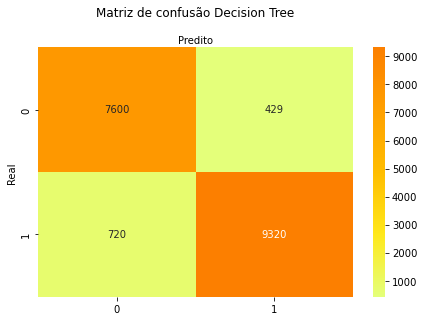

In [83]:
# Matriz de confusão Heatmap

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(grid_matrix), annot=True, cmap="Wistia" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusão Decision Tree', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predito');

- houve melhorias nos verdadeiros negativos e verdadeiros positivos em relação ao modelo anterior. 

In [84]:
# Métricas de mensuração

print(classification_report(y_ts, y_pred_tree))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      8029
           1       0.96      0.93      0.94     10040

    accuracy                           0.94     18069
   macro avg       0.93      0.94      0.94     18069
weighted avg       0.94      0.94      0.94     18069



- **Precision**
   - 1: O modelo previu que 9749 clientes dariam churn, mas  96% deles realmente saíram da empresa.
   - 0: O modelo previu que 8320 clientes continuariam na empresa, mas 91% deles de fato permaneceram.
   
- **Recall**
   - 1: Dos 10040 clientes que realmente deixaram a empresa, o modelo foi capaz de identificar corretamente 93% deles.
   - 0: Dos 8029 clientes que realmente não deram churn, o modelo identificou corretamente 95% deles.
   
- **F1-Score**
   - 1: 94%
   - 0: 93%

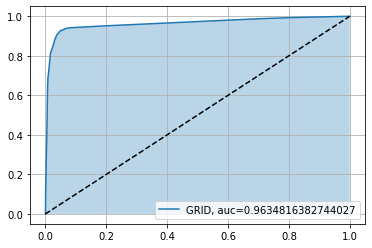

In [85]:
# Curva ROC

y_pred_proba1 = grid.predict_proba(X_ts_encoded)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_ts,  y_pred_proba1)
auc = metrics.roc_auc_score(y_ts, y_pred_proba1)
plt.plot(fpr,tpr,label="GRID, auc="+str(auc))
plt.legend(loc=4)
plt.plot((0,1),(0,1),'k--')
plt.fill_between(fpr, tpr,alpha=.3)
plt.grid()
plt.show()

- O modelo de árvore de decisão demonstrou capacidade de melhorar a precisão e recall, equilibrando assim o F1-score. Além disso, a melhoria na AUC indica uma maior habilidade em distinguir corretamente entre as classes positivas e negativas.

- O modelo de árvore de decisão é escolhido como o modelo final para este projeto.

In [86]:
# Importância de variáveis

importancias = grid.best_estimator_.feature_importances_
ordem = np.argsort(importancias)[::-1]
colunas = X_tr_encoded.columns

for col,imp in zip(colunas[ordem],importancias[ordem]):
    print(f'{col:35s},{imp:.3f}')

reamining_contract_menos que 1     ,0.509
reamining_contract_mais que 1      ,0.369
download_avg                       ,0.076
bill_avg                           ,0.018
subscription_age                   ,0.016
reamining_contract_sem contrato    ,0.008
download_over_limit_1+             ,0.001
upload_avg                         ,0.001
is_tv_subscriber_1                 ,0.001
service_failure_count_2+           ,0.000
service_failure_count_1            ,0.000
is_movie_package_subscriber_1      ,0.000


## Probabilidade de Churn

- Vamos utilizar um modelo de árvore de decisão para atribuir a probabilidade de evasão a cada cliente.

In [87]:
y_ts_df = pd.DataFrame(y_ts)

y_ts_df.loc[:,'pred'] = grid.predict_proba(X_ts_encoded)[:,1]
y_ts_df

,churn,pred
id,,
450056,1,0.993741
1612224,1,0.086194
18341,1,0.978947
43777,1,0.993741
951824,1,0.993741
...,...,...
45426,1,0.369748
567976,1,0.990991
376817,1,0.051282


- Com base na probabilidade de churn do cliente, podemos criar várias ações para tentar mitigar ou evitar a perda do cliente. No entanto, é importante lembrar que as ações a serem tomadas podem variar dependendo da área de negócio e da política adotada pela empresa. 

# 6. Conclusão

- Com o modelo de Churn, podemos prever clientes com maior chance de cancelar o serviço e tomar medidas para evitar sua saída.

- As variáveis mais importante para prever o Churn foram o reamining_contract_mais, download_avg, upload_avg e o subscription_age.

- O modelo de árvore de decisão apresentou F1-score de 94% e AUC  de 0,96. Essas métricas indicam um desempenho muito bom do modelo na tarefa de prever o churn dos clientes.

- Podemos melhorar o modelo de árvore de decisão usando a importância das variáveis. A importância das variáveis nos ajuda a identificar quais características têm o maior impacto na previsão do churn. Podemos usar essa informação para simplificar o modelo, removendo variáveis menos relevantes e mantendo apenas aquelas que têm um impacto significativo.

- Na regressão logística, podemos reduzir a quantidade de variáveis modificando o classificador para fazer uma regularização LASSO